In [47]:
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '1'
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [9]:
df=pd.read_csv('HIGGS_8K.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,0.0,1.630428,0.404143,0.401026,2.722409,0.355644,1.362199,0.015818,-1.174111,0.000000,...,0.387635,1.596321,1.550981,0.859235,0.827233,0.995416,0.764766,0.520597,0.850413,0.929865
2,1.0,0.326305,-0.797735,0.223471,1.248234,-1.427857,0.923767,-0.278280,-0.470052,0.000000,...,-0.426866,1.153501,0.000000,0.887944,0.924601,0.987189,0.854094,0.385013,0.789912,0.724627
3,1.0,1.381170,0.521993,0.574698,0.357347,0.037136,0.413057,-0.607036,-1.308270,0.000000,...,0.567525,-1.475778,0.000000,0.936186,1.107217,0.983808,0.693327,0.562045,0.825387,0.846233
4,1.0,0.304161,-0.736375,0.686225,0.477172,-1.274736,0.907003,0.324770,-0.463954,2.173076,...,0.904818,1.165154,0.000000,1.181790,1.033701,0.993943,0.648399,0.936097,0.732592,0.661779


In [11]:
# While examining the data, some string elements were noticed
print(df.dtypes[df.dtypes != 'float64'])

17    object
dtype: object


In [13]:
# After locating the issue, we fix it 
print(f'String value: {df.iloc[0,17]} (type: {type(df.iloc[0, 17])})')
df.iloc[:, 17] = pd.to_numeric(df.iloc[:, 17], errors='coerce').fillna(0) 
print(f'Fixed value: {df.iloc[0, 17]} (type: {type(df.iloc[0, 17])})')

String value: 0.000000000000000000e+00.1 (type: <class 'str'>)
Fixed value: 0.0 (type: <class 'float'>)


In [15]:
# Separation of the data, according to the instructions
classification=df.iloc[:,0]
low_level=df.iloc[:,1:21]
high_level=df.iloc[:,22:]

### Low level

Confusion matrix for the low level is: 
[[384 594]
 [217 806]]
Accuracy score is: 0.5947026486756621


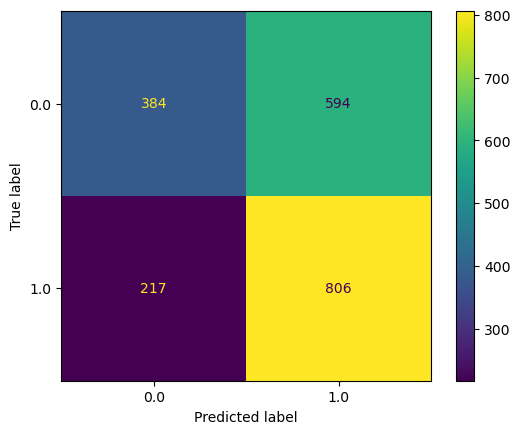

In [88]:
# Dividing the dataset in training and test data
low_level_train, low_level_test, classification_train, classification_test = train_test_split(low_level, classification, 
                                                                                              test_size=0.25, random_state=42)

# Feature scaling
scaler = StandardScaler()
low_level_train_scaled = scaler.fit_transform(low_level_train)
low_level_test_scaled =scaler.transform(low_level_test)

# KNN classification
classifier = KNeighborsClassifier(n_neighbors = 50)
classifier.fit(low_level_train_scaled, classification_train)

# Prediction of 1 or 0
low_level_test_pred = classifier.predict(low_level_test_scaled)

# Calculating the confusion matrix and the accuracy 
conf_matr=confusion_matrix(classification_test, low_level_test_pred)
print(f'Confusion matrix for the low level is: \n{conf_matr}')
print(f'Accuracy score is: {accuracy_score(classification_test, low_level_test_pred)}')

# Confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matr, display_labels=classifier.classes_)
disp.plot()
plt.show()

In [86]:
# We test for varius values of number of neighbors
for k in [1, 3, 5, 10, 20, 50]:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(low_level_train_scaled, classification_train)
    pred = classifier.predict(low_level_test_scaled)
    print(f"k={k}: Accuracy = {accuracy_score(classification_test, pred):.3f}")

k=1: Accuracy = 0.537
k=3: Accuracy = 0.554
k=5: Accuracy = 0.547
k=10: Accuracy = 0.566
k=20: Accuracy = 0.575
k=50: Accuracy = 0.595


### High level

Confusion matrix for the low level is: 
[[634 344]
 [309 714]]
Accuracy score is: 0.6736631684157921


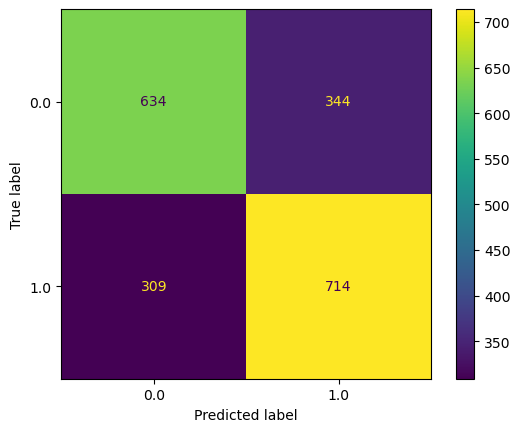

In [58]:
# Dividing the dataset in training and test data
high_level_train, high_level_test, classification_train, classification_test = train_test_split(high_level, classification, 
                                                                                              test_size=0.25, random_state=42)
# Feature scaling
scaler = StandardScaler()
high_level_train_scaled = scaler.fit_transform(high_level_train)
high_level_test_scaled =scaler.transform(high_level_test)

# KNN classification
classifier = KNeighborsClassifier(n_neighbors = 20)
classifier.fit(high_level_train_scaled, classification_train)

# Prediction of 1 or 0
high_level_test_pred = classifier.predict(high_level_test_scaled)
#print(low_level_test_pred)

# Calculating the confusion matrix and the accuracy 
conf_matr=confusion_matrix(classification_test, high_level_test_pred)
print(f'Confusion matrix for the low level is: \n{conf_matr}')
print(f'Accuracy score is: {accuracy_score(classification_test, high_level_test_pred)}')

# Confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matr, display_labels=classifier.classes_)
disp.plot()
plt.show()

In [90]:
# We test for varius values of number of neighbors
for k in [1, 3, 5, 10, 20, 50]:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(high_level_train_scaled, classification_train)
    pred = classifier.predict(high_level_test_scaled)
    print(f"k={k}: Accuracy = {accuracy_score(classification_test, pred):.3f}")

k=1: Accuracy = 0.615
k=3: Accuracy = 0.657
k=5: Accuracy = 0.659
k=10: Accuracy = 0.662
k=20: Accuracy = 0.674
k=50: Accuracy = 0.660
